In [4]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('police.csv')


In [11]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [12]:
data= df.pivot_table(values='id' , index='race', columns='signs_of_mental_illness',aggfunc='count' )

In [14]:
data

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [24]:
data["percent"] = data[True] / data.apply(sum,axis=1)

In [25]:
data["percent"]

race
A    0.258065
B    0.141757
H    0.174058
N    0.179487
O    0.229167
W    0.287964
Name: percent, dtype: float64

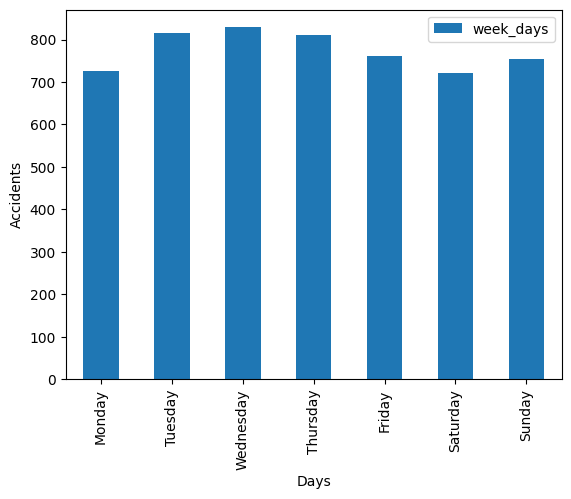

In [23]:
df['date'] = pd.to_datetime(df['date'])
df['week_days'] = df['date'].dt.day_name()
week_days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ile_dni = df['week_days'].value_counts().reindex(week_days)
ile_dni.plot(kind="bar")
df.head()


plt.legend()
plt.xlabel('Days')
plt.ylabel('Accidents')
plt.show()

In [20]:
data_0 = df.pivot_table(index='state', values='manner_of_death',aggfunc='count' )
table_3= pd.DataFrame(data_0)

data_1= pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
table_2 = pd.DataFrame(data_1[0])

data_2= pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=2)
table_1= pd.DataFrame(data_2[0])
table_1 = table_1['Unnamed: 3'].iloc[9:][:69]
table_2 =table_2['Population estimate, July 1, 2019 [2]']
table_3 =table_3['manner_of_death']
len_1 = len(table_1)
len_2 = len(table_2)
len_3 = len(table_3)
list_1 =[]
list_2 =[]
list_3 =[]

for i in range(len_1):
   list_1.append(i)
for i in range(len_2):
   list_2.append(i)
for i in range(len_3):
   list_3.append(i)
dictionary = {'kod stanu': table_1 , 'key': list_1 }
dictionary= pd.DataFrame(dictionary)
dictionary_2 = {'Wielkość populacji': table_2 , 'key': list_2  }
dictionary_2 = pd.DataFrame(dictionary_2)
state_table= pd.merge(dictionary ,dictionary_2 , how='inner' ,on='key')
dictionary_3 = {'ilość wypadków-zgonów': table_3, 'key': list_3}
dictionary_3 = pd.DataFrame(dictionary_3)
state_table= pd.merge(state_table ,dictionary_3 , how='inner' ,on='key')
state_table['Ilość zgonów na 1000']= (state_table['ilość wypadków-zgonów']/state_table['Wielkość populacji'])*1000

C:\Users\Dawid Dymke\AppData\Local\Temp\ipykernel_17472\2834118429.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  table_1 = table_1['Unnamed: 3'].iloc[9:][:69]


In [21]:
state_table

,kod stanu,key,Wielkość populacji,ilość wypadków-zgonów,Ilość zgonów na 1000
0,AL,0,39512223,39,0.000987
1,AK,1,28995881,104,0.003587
2,AZ,2,21477737,83,0.003864
3,AR,3,19453561,254,0.013057
4,CA,4,12801989,799,0.062412
5,CO,5,12671821,195,0.015388
6,CT,6,11689100,21,0.001797
7,DE,7,10617423,13,0.001224
8,DC,8,10488084,13,0.001240
9,FL,9,9986857,350,0.035046
